<a href="https://colab.research.google.com/github/BastienCherel/Advanced-ML-I/blob/main/Lab4_AutoML_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 4: Introduction to AutoML Using TPOT

### **Objective**:
In this lab, you will explore Automated Machine Learning (AutoML), focusing on the TPOT library, which automates the process of feature selection, model selection, and hyperparameter optimization using genetic programming. By the end of this lab, you’ll understand how to leverage TPOT for automating the model building pipeline.

### Prerequisites:

•	Basic knowledge of Machine Learning.

•	Familiarity with supervised learning models and the concept of model evaluation metrics.

•	Required Libraries: pandas, sklearn, TPOT.

### **1. Introduction to AutoML and TPOT**

AutoML helps automate the end-to-end process of applying machine learning models to real-world problems. It assists with tasks like:

•	Preprocessing data.

•	Selecting features.

•	Tuning hyperparameters.

•	Training models.

TPOT (Tree-based Pipeline Optimization Tool) is a Python library that uses genetic programming to automate the machine learning pipeline. It automatically optimizes models and discovers the best pipeline for a given dataset.

#### **Step 1.1: Install Required Libraries**



In [1]:
# Install TPOT (if not installed)
%pip install tpot scikit-learn pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 67.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 44.9 MB/s eta 0:00:0000:0100:01
  Created wheel for deap: filename=deap-1.4.1-cp312-cp312-linux_x86_64.whl size=142299 sha256=1f9ff40f59c759de7dec1dfbc32e55f78e05b8d50f22583f3920b18031b65bf7
  Stored in directory: /home/codespace/.cache/pip/wheels/6c/1d/91/0a68add63bf57c3263b06b3462179d244fed0ff1dbb8d5eff0
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=372225a04663339a2369678a7693cccb63ec7ca17060ab046d9ef23cb1646322
  Stored in directory: /home/codespace/.cac

### **2. Load and Explore the Dataset**

In this step, we’ll load a dataset to be used with AutoML. We’ll work with the breast cancer dataset from sklearn.

#### **Step 2.1: Load the Dataset**

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the first few rows of the dataset
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
124,13.37,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.26,22.75,91.99,632.1,0.10250,0.2531,0.3308,0.08978,0.2048,0.07628
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.3635,0.3219,0.11080,0.2827,0.09208
195,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.10970,0.1506,0.1764,0.08235,0.3024,0.06949
545,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.35,29.09,97.58,729.8,0.12160,0.1517,0.1049,0.07174,0.2642,0.06953


#### **Step 2.2: Check Dataset Information**

In [3]:
# Check the shape of the dataset
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Check for missing values
print("\nMissing values:\n", X_train.isnull().sum())

# Basic statistics of the dataset
X_train.describe()

Shape of X_train: (398, 30)
Shape of y_train: (398,)

Missing values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.176078,19.159171,92.256332,659.770854,0.095962,0.103303,0.088071,0.048440,0.180308,0.062664,...,16.287322,25.505553,107.363844,881.848241,0.131772,0.249086,0.268497,0.113839,0.288300,0.083537
std,3.535730,4.214074,24.289529,358.865452,0.013766,0.051209,0.077836,0.037712,0.026871,0.007248,...,4.799691,6.017564,33.083204,570.753903,0.023023,0.148622,0.196139,0.063886,0.062318,0.017518
min,7.691000,9.710000,48.340000,170.400000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,11.752500,16.170000,75.805000,426.175000,0.085550,0.063407,0.029585,0.020692,0.161575,0.057665,...,13.075000,21.070000,84.542500,521.550000,0.114325,0.147325,0.116475,0.063885,0.247775,0.071155
50%,13.275000,18.700000,85.980000,546.250000,0.094625,0.091280,0.061880,0.034110,0.178800,0.061325,...,14.975000,25.155000,97.745000,687.600000,0.131150,0.209250,0.226200,0.099270,0.280750,0.080165
75%,16.090000,21.555000,105.625000,797.400000,0.104475,0.130575,0.127075,0.073963,0.195550,0.066007,...,18.707500,29.410000,125.300000,1061.250000,0.146000,0.341600,0.384700,0.160400,0.315650,0.091745
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,0.903400,0.275600,0.663800,0.173000


#### Discussion points:

•	Explore the dataset’s features and labels.

•	Check if there are any missing values or preprocessing needed before applying TPOT.

### **3. Introduction to TPOT**


TPOT uses genetic algorithms to search for the best machine learning pipeline. It evaluates multiple pipelines, refines the best-performing ones, and finally returns the most optimized pipeline based on the given dataset.

#### **Step 3.1: Initialize TPOT Classifier**

We’ll use the TPOTClassifier for a binary classification task.


In [ ]:
from tpot import TPOTClassifier

# Initialize TPOTClassifier with hyperparameters
tpot = TPOTClassifier(
    generations=5,           # Number of iterations of the genetic algorithm
    population_size=20,       # Size of the population in each generation
    verbosity=2,              # Verbosity level (higher for more detailed output)
    random_state=42,
    n_jobs=-1                 # Use all available CPU cores
)

/Users/alimokh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


#### **Step 3.2 Fit TPOT to the Training Data**

In [ ]:
# Fit the TPOTClassifier on the training data
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]

/Users/alimokh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/alimokh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/alimokh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/alimokh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compi

                                                                             
Generation 1 - Current best internal CV score: 0.9597784810126582
                                                                             
Generation 2 - Current best internal CV score: 0.9723734177215189
                                                                             
Generation 3 - Current best internal CV score: 0.9723734177215189
                                                                             
Generation 4 - Current best internal CV score: 0.9723734177215189
                                                                              
Generation 5 - Current best internal CV score: 0.9723734177215189
                                                                              
Best pipeline: MLPClassifier(RobustScaler(input_matrix), alpha=0.1, learning_rate_init=0.01)


TPOTClassifier(generations=5, n_jobs=-1, population_size=20, random_state=42,
               verbosity=2)


**Note:** Training TPOT may take some time, as it evaluates many pipelines across generations.

### **4. Evaluating the Performance of the TPOT Model**

After training, TPOT will output the best pipeline it discovered. You can then evaluate the performance of the discovered pipeline on the test data.

#### **Step 4.1: Evaluate on Test Data**

In [ ]:
# Evaluate the performance of the model on the test set
test_score = tpot.score(X_test, y_test)
print(f"Test Accuracy: {test_score * 100:.2f}%")

Test Accuracy: 97.66%


#### **Step 4.2: Export the Discovered Pipeline**

TPOT will generate a Python script that defines the best pipeline discovered during the optimization process. This allows you to save and reuse the pipeline in future projects.

In [ ]:
# Export the pipeline as a Python script
tpot.export('tpot_best_pipeline.py')

# The pipeline is saved to 'tpot_best_pipeline.py'

**Observation**: Recall for the minority class improves.

### **5. Interpreting the Optimized Pipeline**

Let’s examine the content of the exported pipeline to understand which model and preprocessing steps were selected by TPOT.

#### **Step 5.1: Load the Exported Pipeline**

In [ ]:
# Load and display the contents of the exported pipeline
with open('tpot_best_pipeline.py', 'r') as file:
    pipeline_code = file.read()

print(pipeline_code)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.9723734177215189
exported_pipeline = make_pipeline(
    RobustScaler(),
    MLPClassifier(alpha=0.1, learning_rate_init=0.01)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
r

**Discussion:** Analyze the pipeline. Look for the preprocessing steps (e.g., scaling, imputation), the model chosen, and any hyperparameters.

### **6. Visualizing the Evolution of the Genetic Algorithm**

TPOT logs the performance of each generation during the genetic algorithm search. We can visualize how the best pipeline evolves over time.

#### **Step 6.1: Visualize Performance Over Generations**

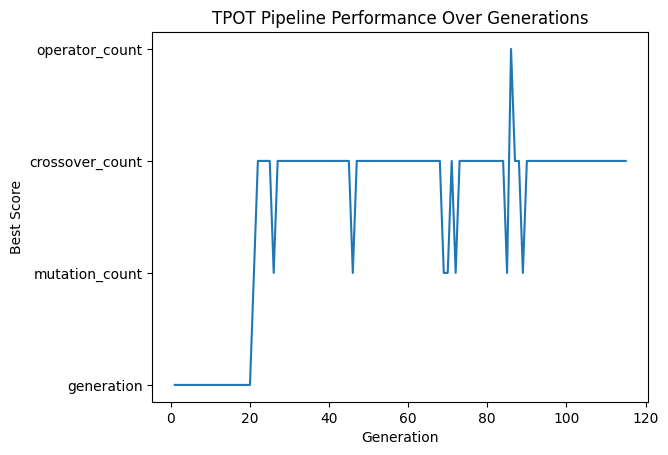

In [ ]:
# Extract the scores from TPOT's internal log
generation_scores = tpot.evaluated_individuals_

# Visualize the performance of pipelines across generations
generations = list(range(1, len(generation_scores) + 1))
best_scores = [
    min(
        {k: v for k, v in generation_scores[generation].items() if isinstance(v, int)},
        key=generation_scores[generation].get
    )
    for generation in generation_scores
]

plt.plot(generations, best_scores)
plt.title("TPOT Pipeline Performance Over Generations")
plt.xlabel("Generation")
plt.ylabel("Best Score")
plt.show()

### **7. Hyperparameter Tuning with TPOT**

TPOT offers several hyperparameters that can be fine-tuned to control the optimization process.

#### **Step 7.1: Experiment with Different Hyperparameters**

•	Try different values for generations, population_size, or mutation_rate to see how they affect the performance and speed.

In [ ]:
# Adjust the hyperparameters and re-run TPOT
tpot_tuned = TPOTClassifier(
    generations=10,        # Increase generations for a longer search
    population_size=50,     # Increase population size for more diversity
    verbosity=2,
    random_state=42,
    n_jobs=-1
)

# Train the model
tpot_tuned.fit(X_train, y_train)

# Evaluate on test set
test_score_tuned = tpot_tuned.score(X_test, y_test)
print(f"Test Accuracy after tuning: {test_score_tuned * 100:.2f}%")

                                                                             
Generation 1 - Current best internal CV score: 0.9748101265822784
                                                                              
Generation 2 - Current best internal CV score: 0.9748101265822784
                                                                              
Generation 3 - Current best internal CV score: 0.9748101265822784
                                                                              
Generation 4 - Current best internal CV score: 0.9748417721518987
                                                                              
Generation 5 - Current best internal CV score: 0.9748417721518987
                                                                              
Generation 6 - Current best internal CV score: 0.9748417721518987
                                                                              
Generation 7 - Current best internal CV score: 0.977

**Discussion:**

•	How do different values of generations and population_size affect the final accuracy?

•	Does a larger population size improve the quality of the final pipeline?

### **8. Feature Importance and Interpretability**

While TPOT automates the pipeline discovery process, it’s also useful to understand the importance of features in the final model.

#### **Step 8.1: Feature Importance for Tree-Based Models**

If the best model in the pipeline is tree-based (e.g., Random Forest or XGBoost), you can access feature importance scores.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Check if the best model is tree-based, then calculate feature importance
best_model = tpot.fitted_pipeline_.steps[-1][1]

if isinstance(best_model, RandomForestClassifier):
    feature_importance = best_model.feature_importances_
    # Create a DataFrame to display feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    # Display feature importance
    print(feature_importance_df)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()

**Discussion:**

•	Which features are most important in the final model?

•	Does this align with your intuition about the dataset?

## **Homework**

Try TPOT on Different Datasets:

•	Download and load a new dataset, such as the Iris dataset or the Titanic dataset

•	Use TPOT to optimize the machine learning pipeline.